In [56]:
from data.dataset import DetectionData

dataset = DetectionData('/root/storage/BKH/DET/train_data/dataset_v1.3/test/')
test = dataset[2]

UnpicklingError: invalid load key, '\xef'.

In [59]:
import pickle

with open('/root/storage/BKH/DET/train_data/dataset_v1.3/02/orig_boxes/60.pkl','rb') as f:
    tt = pickle.load(f)

In [60]:
tt

[{'text': '62', 'box': array([[3325,  308],
         [3293,  308],
         [3325,  343],
         [3293,  343]], dtype=int32), 'chars': [{'text': '6',
    'box': array([[3325,  308],
           [3293,  308],
           [3325,  325],
           [3293,  325]], dtype=int32)},
   {'text': '2', 'box': array([[3325,  328],
           [3293,  328],
           [3325,  343],
           [3293,  343]], dtype=int32)}]},
 {'text': '1', 'box': array([[3325,  520],
         [3302,  520],
         [3325,  525],
         [3302,  525]], dtype=int32), 'chars': [{'text': '1',
    'box': array([[3325,  520],
           [3302,  520],
           [3325,  525],
           [3302,  525]], dtype=int32)}]},
 {'text': '2013', 'box': array([[3325,  555],
         [3301,  555],
         [3325,  603],
         [3301,  603]], dtype=int32), 'chars': [{'text': '2',
    'box': array([[3325,  555],
           [3301,  555],
           [3325,  564],
           [3301,  564]], dtype=int32)},
   {'text': '0', 'box': array([[33

In [8]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import pickle
import os

In [9]:
'''
path = '/root/storage/BKH/DET/train_data/dataset_v1.3/02/'
box_folder = 'orig_boxes'
img_folder = 'orig_texts'

for filename in os.listdir(os.path.join(path,box_folder)):
    file = filename.split('.')[0]
    image = Image.open(os.path.join(path,img_folder,file+'.png'))
    img = np.asarray(image)/255
                       
    with open(os.path.join(path,box_folder,file+'.pkl'),'rb') as f:
        boxes = pickle.load(f)
    new_list = list()
    for i,word in enumerate(boxes):
        new_list.append(word['box'][np.newaxis,:,:])
        '''

"\npath = '/root/storage/BKH/DET/train_data/dataset_v1.3/02/'\nbox_folder = 'orig_boxes'\nimg_folder = 'orig_texts'\n\nfor filename in os.listdir(os.path.join(path,box_folder)):\n    file = filename.split('.')[0]\n    image = Image.open(os.path.join(path,img_folder,file+'.png'))\n    img = np.asarray(image)/255\n                       \n    with open(os.path.join(path,box_folder,file+'.pkl'),'rb') as f:\n        boxes = pickle.load(f)\n    new_list = list()\n    for i,word in enumerate(boxes):\n        new_list.append(word['box'][np.newaxis,:,:])\n        "

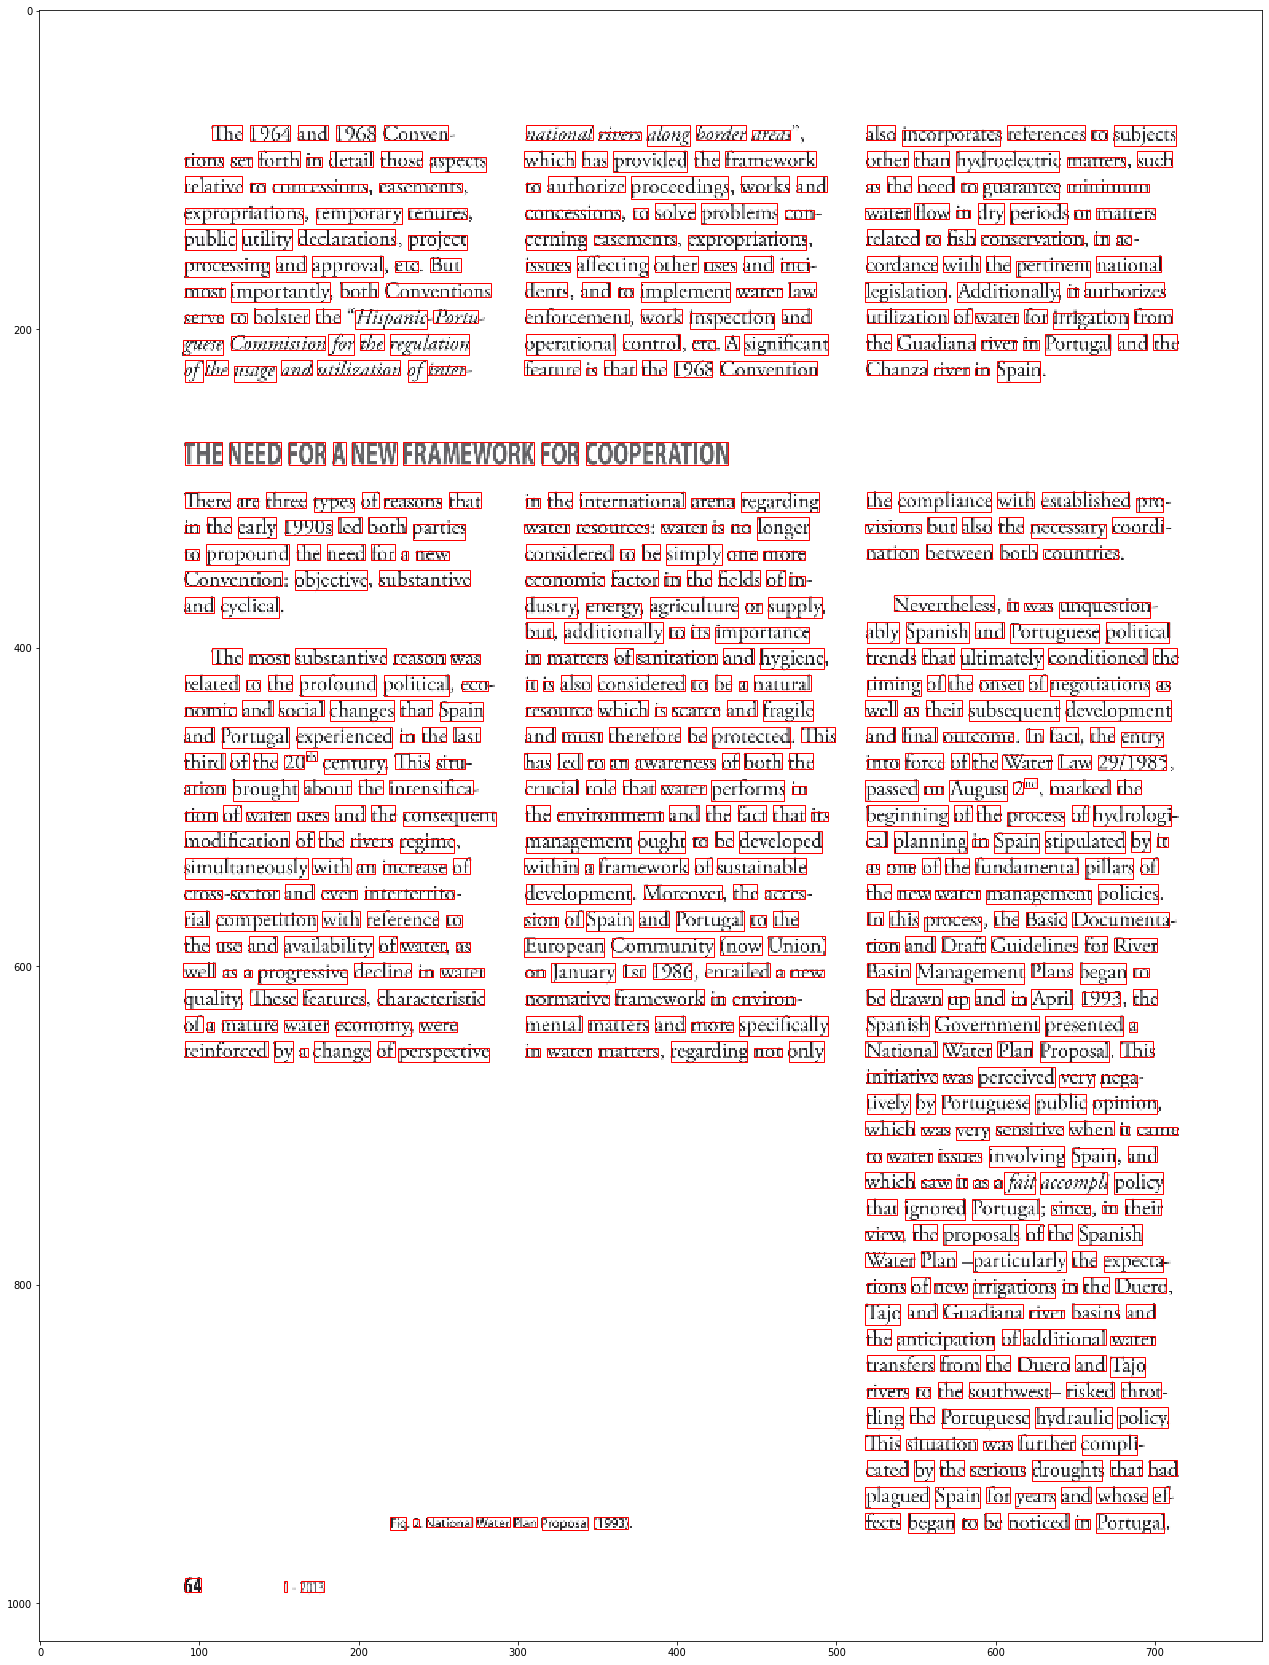

In [33]:

def calc_point(points):
    max_x = max(points[:,0])
    min_x = min(points[:,0]) 
    max_y = max(points[:,1]) 
    min_y = min(points[:,1]) 
    diff_x = max_x-min_x
    diff_y = max_y-min_y
    for point in points:
        if point[0]==min_x and point[1]==min_y:
            return diff_x,diff_y,point
        
import matplotlib.patches as patches


fig, ax = plt.subplots(figsize=(30,30))
ax.imshow(test['image'])

for word in test['polygons']:
    diff_x,diff_y,point = calc_point(word)
    rect = patches.Rectangle(point,diff_x,diff_y,facecolor='none', linewidth=1, edgecolor='r')
    ax.add_patch(rect)
plt.show()


def resize_with_coordinates(image, width, height, coordinates):
    original_height, original_width = image.shape[:2]
    resized_image = cv2.resize(image, (width, height))
    
    new_coord = coordinates.copy()
    if coordinates is not None:
        rate_x = width / original_width
        rate_y = height / original_height
        for i,coord in enumerate(coordinates):
            new_coord[i] = coord * (rate_x, rate_y)
    return resized_image, new_coord

def get_origin_coordinates(resized, origin, coordinates):
    original_height, original_width = origin.shape[:2]
    re_height, re_width = resized.shape[:2]
    
    new_coord = coordinates.copy()
    if coordinates is not None:
        
        rate_x = original_width / re_width
        rate_y = original_height / re_height
        for i,coord in enumerate(coordinates):
            print(coord)
            new_coord[i] = coord * (rate_x, rate_y)
    return new_coord

In [34]:
gt = np.concatenate([i['box'][np.newaxis,:,:]for i in boxes])

In [35]:
gt.shape

(665, 4, 2)

In [36]:
gt

array([[[3325,  309],
        [3293,  309],
        [3325,  345],
        [3293,  345]],

       [[3325,  520],
        [3302,  520],
        [3325,  525],
        [3302,  525]],

       [[3325,  555],
        [3301,  555],
        [3325,  603],
        [3301,  603]],

       ...,

       [[ 550, 1959],
        [ 517, 1959],
        [ 550, 2008],
        [ 517, 2008]],

       [[ 561, 2022],
        [ 517, 2022],
        [ 561, 2231],
        [ 517, 2231]],

       [[ 561, 2244],
        [ 531, 2244],
        [ 561, 2315],
        [ 531, 2315]]], dtype=int32)

In [37]:
a,b=resize_with_coordinates(img,768,1024,gt)

[[982  92]
 [973  92]
 [982 103]
 [973 103]]
[[982 155]
 [975 155]
 [982 156]
 [975 156]]
[[982 165]
 [975 165]
 [982 180]
 [975 180]]
[[ 84 525]
 [ 69 525]
 [ 84 609]
 [ 69 609]]
[[ 80 612]
 [ 69 612]
 [ 80 659]
 [ 69 659]]
[[ 84 663]
 [ 70 663]
 [ 84 721]
 [ 70 721]]
[[ 97 524]
 [ 85 524]
 [ 97 546]
 [ 85 546]]
[[ 97 550]
 [ 85 550]
 [ 97 569]
 [ 85 569]]
[[100 573]
 [ 85 573]
 [100 669]
 [ 85 669]]
[[945  92]
 [937  92]
 [945 138]
 [937 138]]
[[942 142]
 [937 142]
 [942 160]
 [937 160]]
[[942 165]
 [932 165]
 [942 206]
 [932 206]]
[[945 210]
 [932 210]
 [945 273]
 [932 273]]
[[942 308]
 [936 308]
 [942 357]
 [936 357]]
[[945 361]
 [932 361]
 [945 406]
 [932 406]]
[[945 537]
 [937 537]
 [945 581]
 [937 581]]
[[942 586]
 [932 586]
 [942 630]
 [932 630]]
[[942 633]
 [932 633]
 [942 652]
 [932 652]]
[[942 657]
 [932 657]
 [942 668]
 [932 668]]
[[945 673]
 [932 673]
 [945 697]
 [932 697]]
[[926  92]
 [916  92]
 [926 107]
 [916 107]]
[[926 112]
 [916 112]
 [926 156]
 [916 156]]
[[929 161]

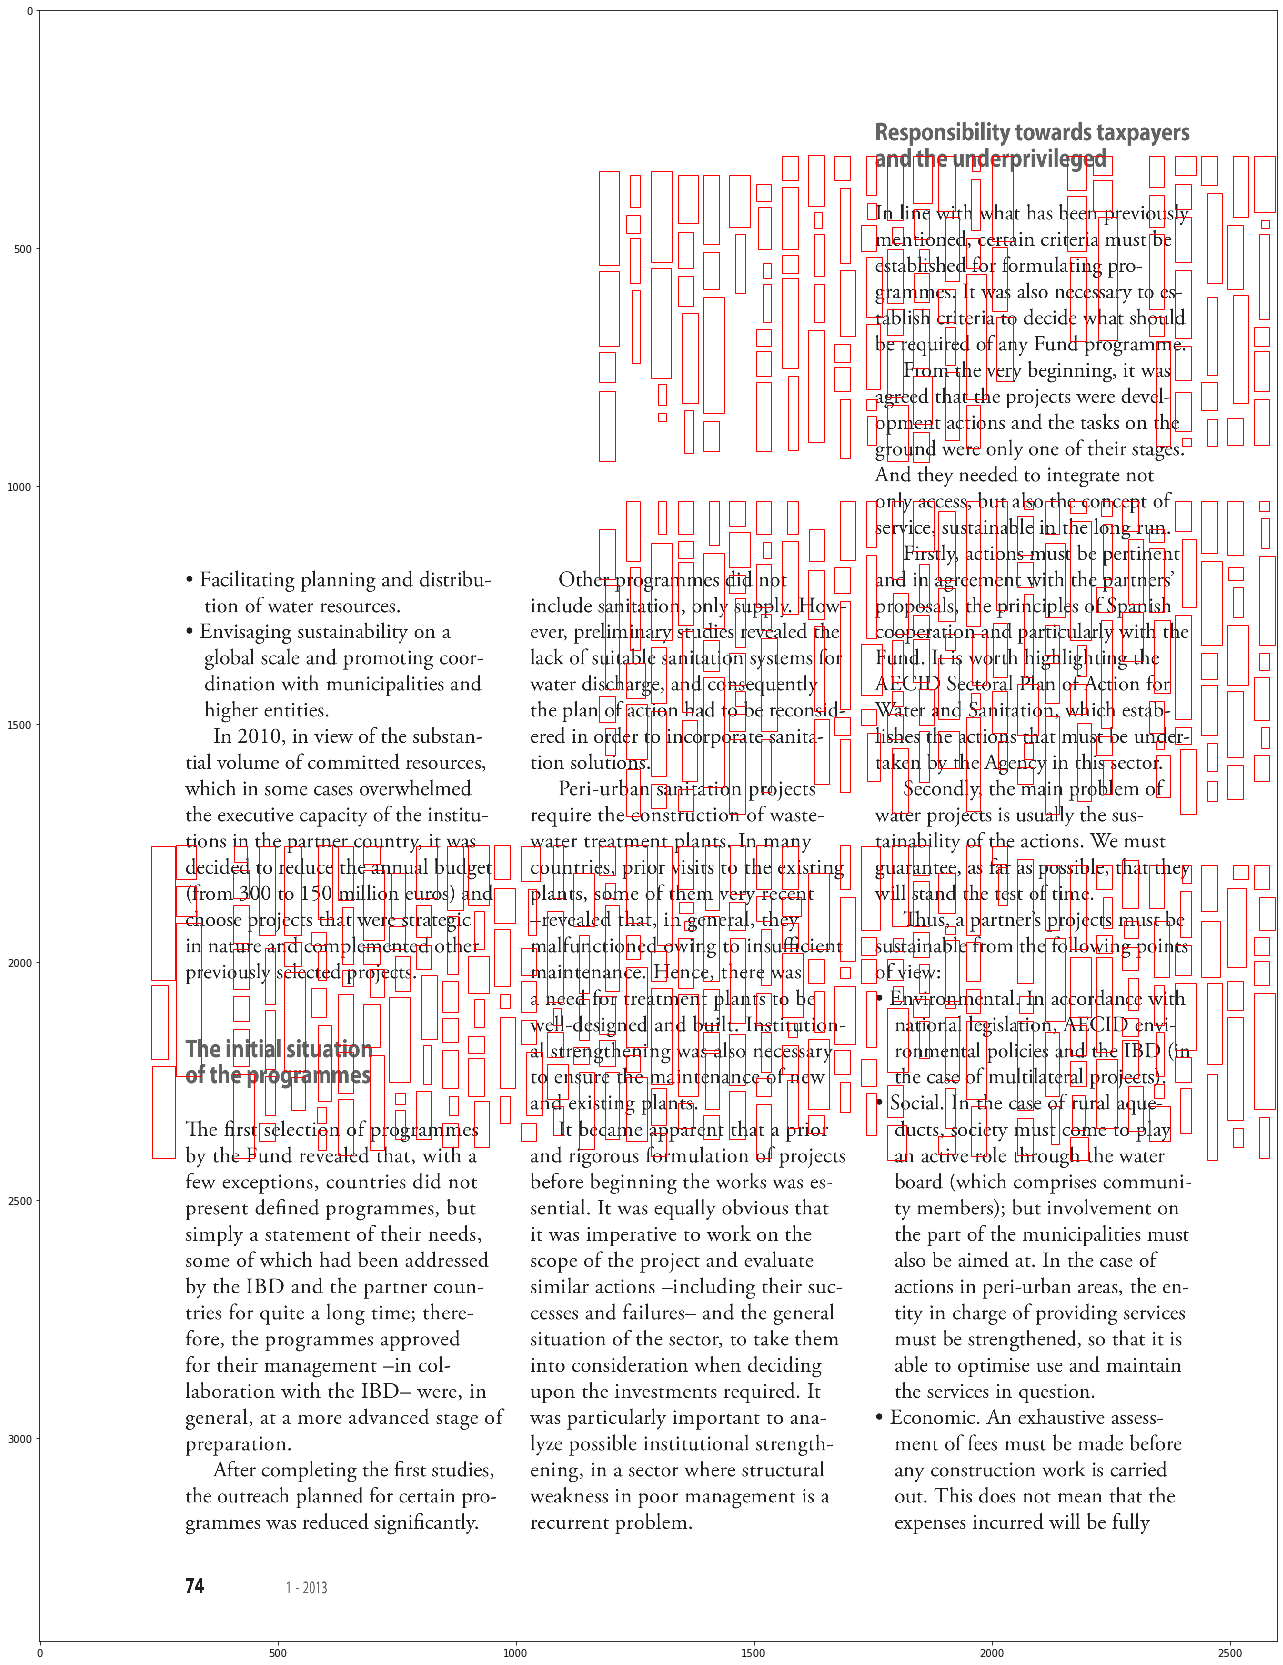

In [38]:
bbox = get_origin_coordinates(a,img,b)
fig, ax = plt.subplots(figsize=(30,30))
ax.imshow(img)

for word in bbox:
    diff_x,diff_y,point = calc_point(word)
    rect = patches.Rectangle(point,diff_x,diff_y,facecolor='none', linewidth=1, edgecolor='r')
    ax.add_patch(rect)
plt.show()

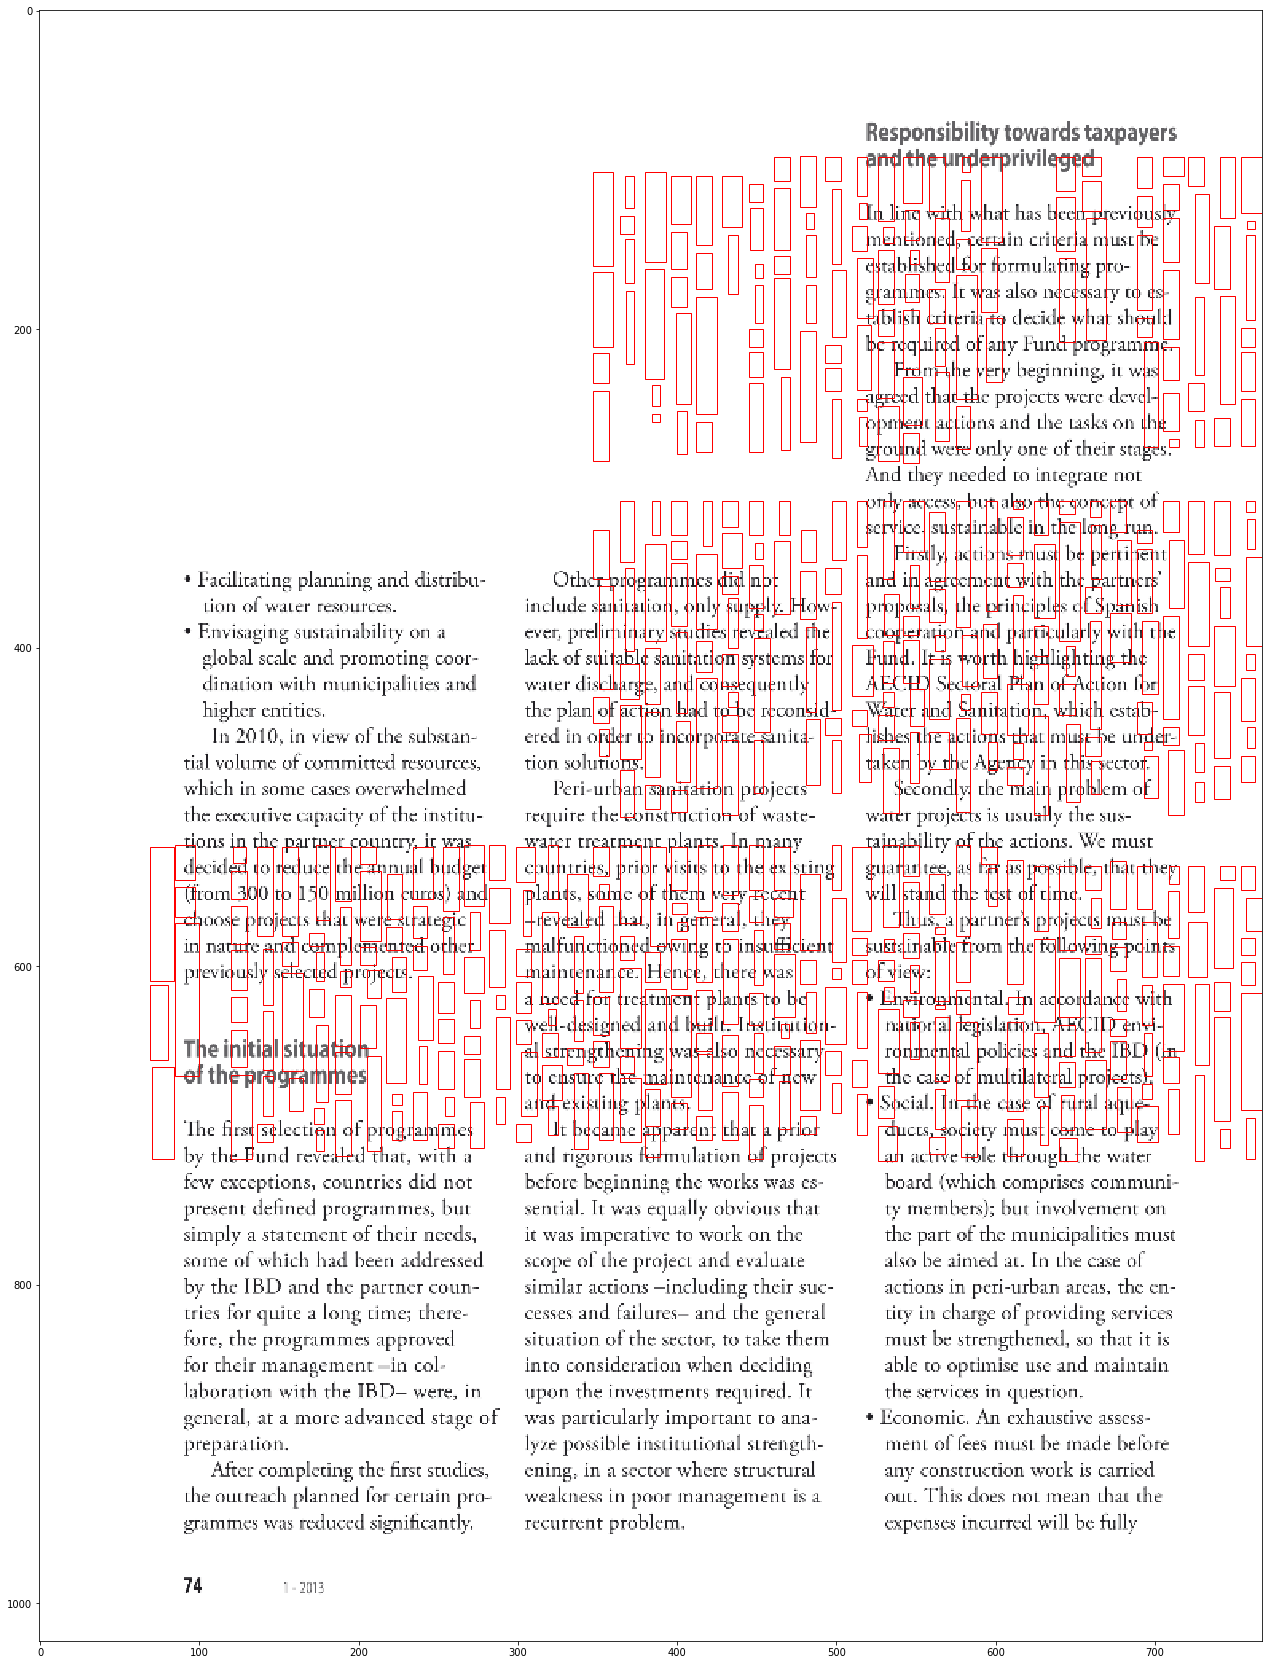

In [39]:
fig, ax = plt.subplots(figsize=(30,30))
ax.imshow(a)

for word in b:
    diff_x,diff_y,point = calc_point(word)
    rect = patches.Rectangle(point,diff_x,diff_y,facecolor='none', linewidth=1, edgecolor='r')
    ax.add_patch(rect)
plt.show()

In [25]:
from scipy import interpolate

def intersection(x, p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    if x2 == x1:
        return 0
    k = (x - x1) / (x2 - x1)
    return k * (y2 - y1) + y1


def midpoint(p1, p2, typed=float):
    return [typed((p1[0] + p2[0]) / 2), typed((p1[1] + p2[1]) / 2)]

def box2seg(image, boxes):
    height, width = image.shape[:2]
    mask = np.zeros((height, width), dtype=np.float32)
    seg = np.zeros((height, width), dtype=np.float32)
    points = []
    for box_index in range(boxes.shape[0]):
        box = boxes[box_index, :, :] # 4x2
        left_top = box[0]
        right_top = box[1]
        right_bottom = box[2]
        left_bottom = box[3]

        left = [(left_top[0] + left_bottom[0]) / 2, (left_top[1] + left_bottom[1]) / 2]
        right = [(right_top[0] + right_bottom[0]) / 2, (right_top[1] + right_bottom[1]) / 2]

        center = midpoint(left, right)
        points.append(midpoint(left, center))
        points.append(midpoint(right, center))

        poly = np.array([midpoint(left_top, center),
            midpoint(right_top, center),
            midpoint(right_bottom, center),
            midpoint(left_bottom, center)
            ])
        seg = cv2.fillPoly(seg, [poly.reshape(4, 1, 2).astype(np.int32)], (255,255,255))

    left_y = intersection(0, points[0], points[1])
    right_y = intersection(width, points[-1], points[-2])
    points.insert(0, [0, left_y])
    points.append([width, right_y])
    points = np.array(points)

    f = interpolate.interp1d(points[:, 0], points[:, 1], fill_value='extrapolate')
    xnew = np.arange(0, width, 1)
    ynew = f(xnew).clip(0, height-1)
    for x in range(width - 1):
        mask[int(ynew[x]), x] = 1
    return ynew.reshape(1, -1).round(), seg, mask

In [26]:
c,d, mask = box2seg(a,b)

In [27]:
mask.shape

(1024, 768)

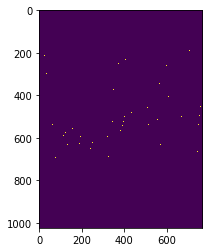

In [28]:
plt.imshow(mask)

In [16]:
tc.shape

NameError: name 'tc' is not defined

In [17]:
from DB.db_detector import SegDetector
from DB.db_mobilenet import mobilenet_v3_large
from DB.db_loss import L1BalanceCELoss

tensor_img = torch.from_numpy(a[np.newaxis,:,:,:]).permute(0,3,1,2).contiguous().to(torch.float)

back = mobilenet_v3_large()
res_back = back(tensor_img)
neck = SegDetector(adaptive=True,in_channels=[24, 40, 112, 960],k= 50)
res_neck = neck(res_back)
loss = L1BalanceCELoss()
tc = torch.from_numpy(c).to(torch.float)
td = torch.from_numpy(d).to(torch.float)

loss(res_neck,td.unsqueeze(0).unsqueeze(0),td)

NameError: name 'a' is not defined

In [ ]:
for i in range(4):
    print(res_back[i].shape)

In [ ]:
for i in res_neck.keys():
    print(res_neck[i].shape)

In [ ]:
plt.figure(figsize=(30,30))
plt.imshow(test['image'])

In [ ]:
plt.imshow(test['polygons'])

In [ ]:
plt.imshow(test['ignore_tags'])

In [70]:
for i in test.keys():
    print(test[i].shape,i)

(1024, 768, 3) image
(650, 4, 2) polygons
(650,) ignore_tags
(1024, 768) thresh_map
(1024, 768) thresh_mask
(1, 1024, 768) gt
(1024, 768) mask


In [ ]:
import matplotlib.patches as patches


fig, ax = plt.subplots(figsize=(30,30))
ax.imshow(test['image'])

for word in test['polygons']:
    diff_x,diff_y,point = calc_point(word)
    rect = patches.Rectangle(point,diff_x,diff_y,facecolor='none', linewidth=1, edgecolor='r')
    ax.add_patch(rect)
plt.show()

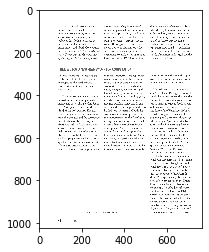

In [51]:
plt.imshow(test['image'])